In [325]:
#Author - Priyanka Singh
#Assignment Topic - Linear Regression
#Problem Statement - Bike Sharing

In [326]:
#Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [327]:
#Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [328]:
#Importing ML packages needed
import sklearn 

#For train test split
from sklearn.model_selection import train_test_split

#For Standardization
from sklearn.preprocessing import MinMaxScaler 

#For calculating r-square
from sklearn.metrics import r2_score 

#For adding constant to the statsmodel method
import statsmodels.api as sm 

#For calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#For using RFE for automatic feature elimination
from sklearn.feature_selection import RFE

#To use it for performing Linear Regression
from sklearn.linear_model import LinearRegression 

#To use it for calculating mse
from sklearn.metrics import mean_squared_error

In [329]:
#Read the data
bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [330]:
#Checking the shape - rows x columns count
bike_data.shape

(730, 16)

In [331]:
#Describing the statistical information for this dataset
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Findings -  The data seems to be fairly distribute across quartiles. 

In [332]:
#Checking for nulls and data types
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values 

In [333]:
#Checking missing values
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values in the dataset

In [334]:
#Renaming the column for better understanding
bike_data.rename(columns = {'yr' : 'Year', 'mnth' : 'Month', 'hum' : 'Humidity', 'cnt' : 'Count'}, inplace = True)
bike_data.head()

,instant,dteday,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [335]:
#Dropping the columns that are of no use

#instant = it is just an index and has no relation to the target variable
#dteday = As we already have separate month and year columns, hence this can be dropped
#Casual and registered = As count column is a sum of casual and registered. There is no use of keeping this column and will also have high correlation

var_list = ['instant', 'dteday', 'casual', 'registered']
bike_data.drop(var_list, axis = 1, inplace = True)

In [336]:
#Verifying the numeric count remaining in the dataset
bike_data.shape


(730, 12)

In [337]:
#Checking dat types
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   Year        730 non-null    int64  
 2   Month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [338]:
#Visualizing head to verify the changes
bike_data.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,Count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [339]:
#Checking unique values of 'weathersit' columns
bike_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [340]:
#Mapping all non-binary variables to their original values

#Though the data dictionary has values from 1-4 in weathersit column but we will substitute till 1-3 as unique values are 1,2,3
bike_data['season'] = bike_data.season.map({1:'spring', 
                                            2:'summer', 
                                            3:'fall', 
                                            4:'winter'})

bike_data['Year'] = bike_data.Year.map({0:'2018',
                                        1:'2019'})

bike_data['Month'] = bike_data.Month.map({1:'Jan',
                                          2:'Feb',
                                          3:'Mar',
                                          4:'Apr',
                                          5:'May',
                                          6:'June', 
                                          7:'July',
                                          8:'Aug', 
                                          9:'Sept',
                                          10:'Oct',
                                          11:'Nov',
                                          12:'Dec'})

bike_data['weekday'] = bike_data.weekday.map({0:'Sun',
                                              1:'Mon',
                                              2:'Tues',
                                              3:'Wed',
                                              4:'Thur',
                                              5:'Fri',
                                              6:'Sat'})

bike_data['weathersit'] = bike_data.weathersit.map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
                                                    2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                                    3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'})

In [341]:
#Verifying the changes done
bike_data.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,Count
0,spring,2018,Jan,0,Sat,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tues,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


In [342]:
#Verifying the changes executed - season
bike_data['season'].value_counts()


fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [343]:
#Verifying the changes executed - Year
bike_data['Year'].value_counts()


2018    365
2019    365
Name: Year, dtype: int64

In [344]:
#Verifying the changes executed - Month
bike_data['Month'].value_counts()


Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sept    60
Nov     60
Feb     56
Name: Month, dtype: int64

In [345]:
#Verifying the changes executed - weekday
bike_data['weekday'].value_counts()


Sat     105
Sun     105
Mon     105
Tues    104
Thur    104
Fri     104
Wed     103
Name: weekday, dtype: int64

In [346]:
#Verifying the changes executed - weathersit
bike_data['weathersit'].value_counts()

Clear, Few clouds, Partly cloudy, Partly cloudy                                            463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: weathersit, dtype: int64

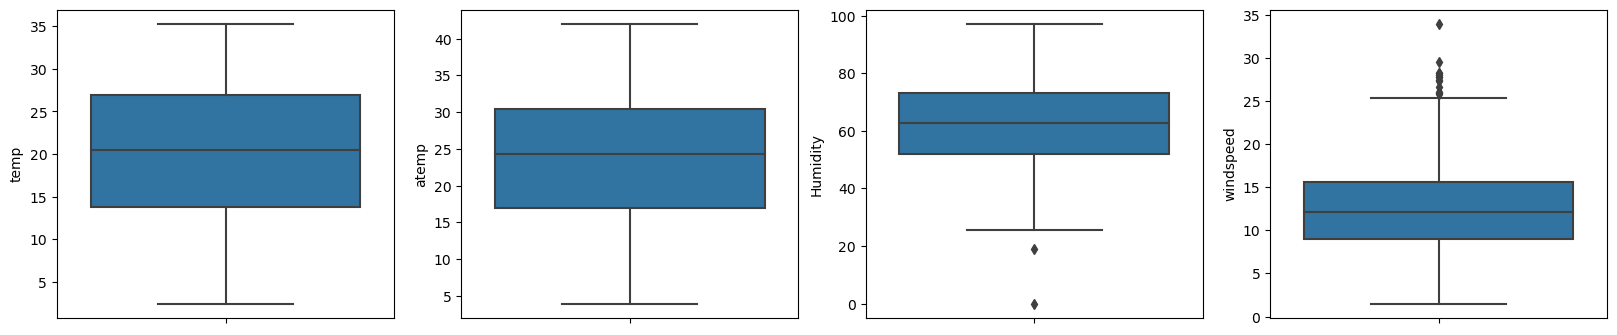

In [347]:
#Outlier check - Draw boxplots for the same
cols = ['temp','atemp','Humidity','windspeed']
plt.figure(figsize = (20,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data = bike_data)
    i+=1

The above box plots shows that there are no outliers to handle

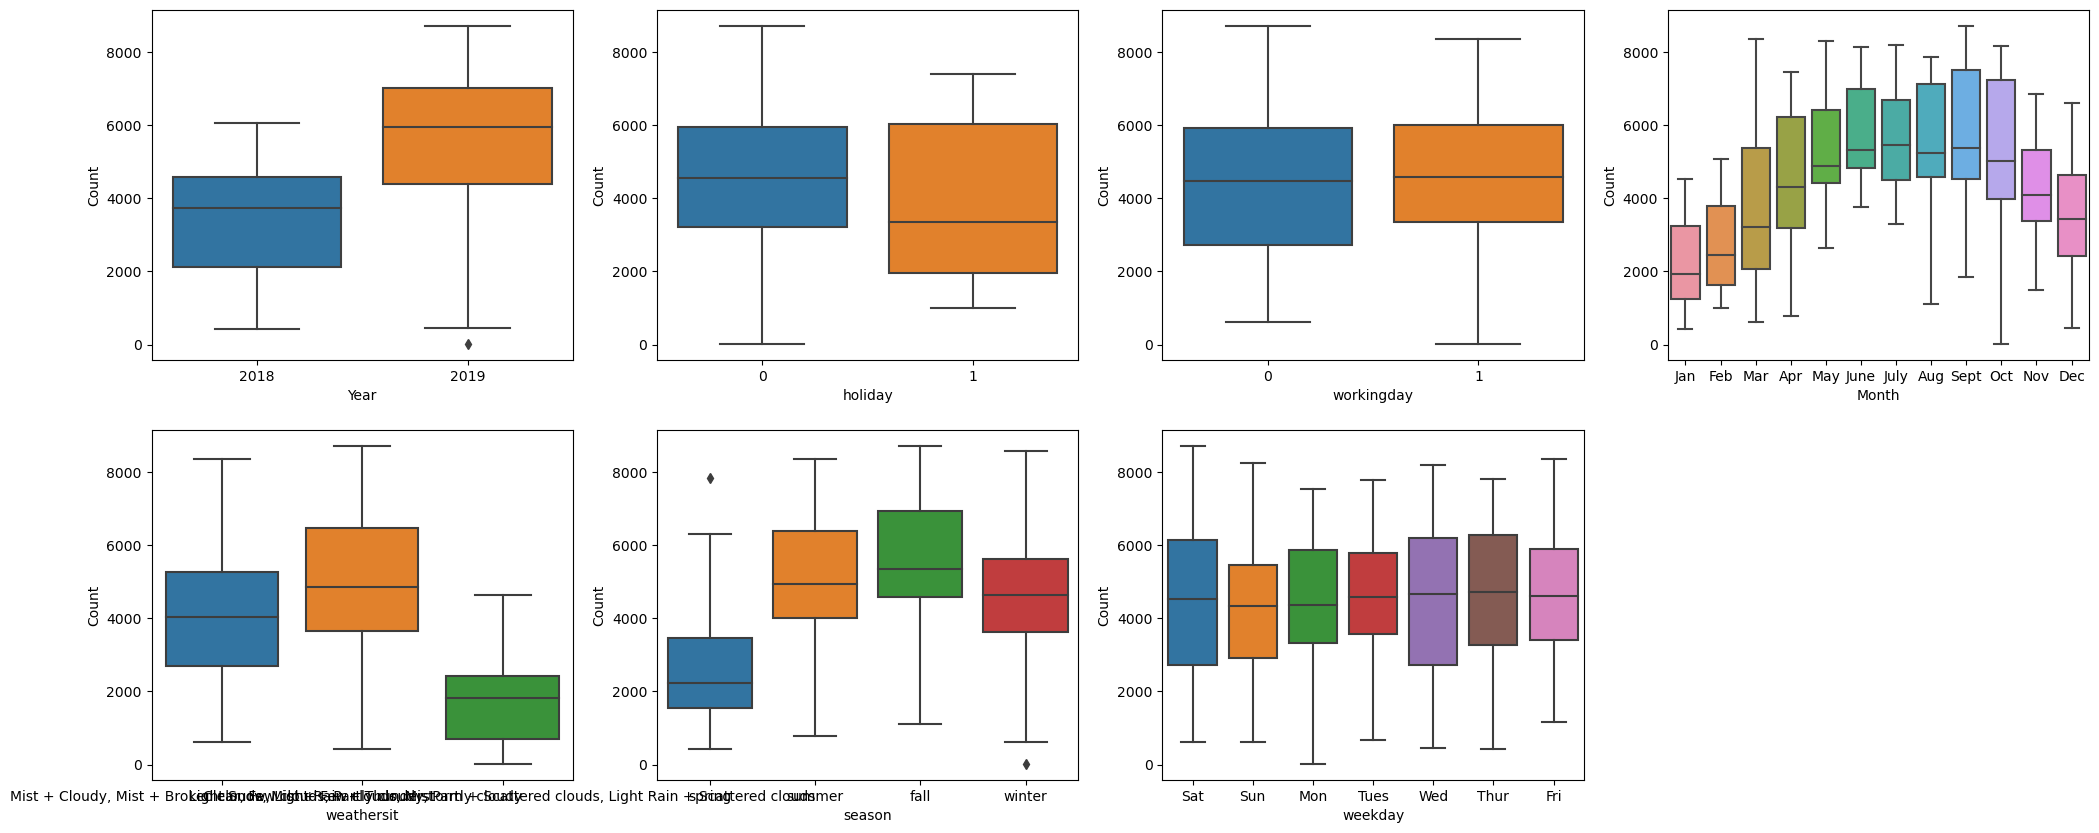

In [348]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(25, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'Count', data = bike_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'Count', data = bike_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'Count', data = bike_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'Month', y = 'Count', data = bike_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'Count', data = bike_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'Count', data = bike_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'Count', data = bike_data)
plt.show()

The plots above shows the relationship between categorical variables and a Target variable.

- Bike Rentals are more during the Fall season and then in summer
- Bike Rentals are more in the year 2019 compared to 2018
- Bike Rentals are more in partly cloudy weather
- Bike Rentals are more on Saturday,wednesday and thursday

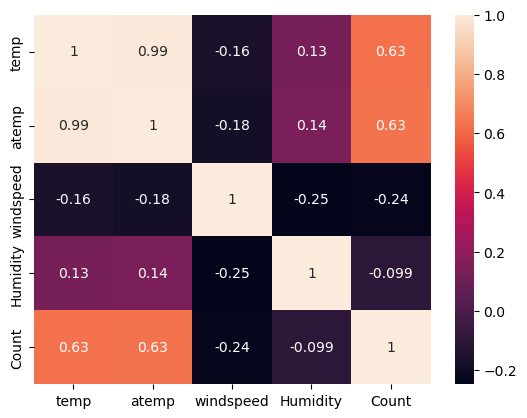

In [349]:
#Checking the correlated between individual variables
sns.heatmap(bike_data[['temp','atemp','windspeed','Humidity','Count']].corr(), annot = True)
plt.show()

As temp, atemp are highly correlated, then one of these can be dropped. But we will drop this in the modelling stage after checking VIF

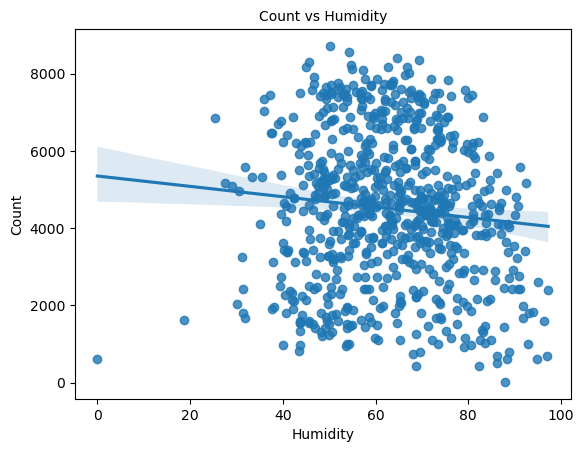

In [350]:
#Plotting to check effect on humidity
plt.title("Count vs Humidity",fontsize=10)
sns.regplot(data=bike_data,x="Humidity",y="Count")
plt.show()

- Humidity shows scattered across
- However, we can see that count is decreasing with increase in humidity

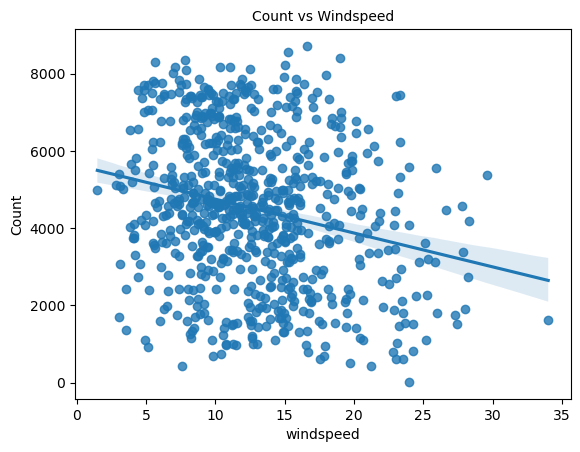

In [351]:
#Plotting to check effect on windspeed
plt.title("Count vs Windspeed",fontsize=10)
sns.regplot(data=bike_data,x="windspeed",y="Count")
plt.show()

- Windspeed values are more scattered
- Windspeed is decreasing with increase in count

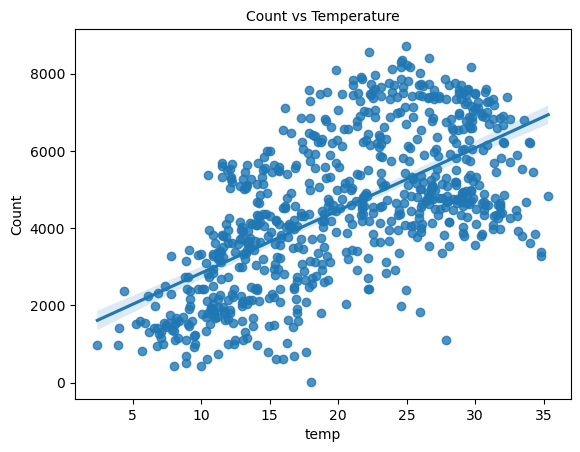

In [352]:
#Plotting to check effect on Temperature
plt.title("Count vs Temperature",fontsize=10)
sns.regplot(data=bike_data,x="temp",y="Count")
plt.show()

- Temp is positively correlated to count

In [353]:
#Creating dummy variables for all the non-binary categorical columns
bike_data = pd.get_dummies(data=bike_data,columns=["season","Month","weekday"],drop_first=True)
bike_data = pd.get_dummies(data=bike_data,columns=["weathersit"])

In [354]:
#Settig python to show all columns
pd.set_option("display.max_columns",31)
print("max_columns value after the change : " + 
      str(pd.options.display.max_columns))
bike_data.head()

max_columns value after the change : 31


,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [355]:
#Checking the columns in the dataset
bike_data.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'atemp', 'Humidity',
       'windspeed', 'Count', 'season_spring', 'season_summer', 'season_winter',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_July',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thur', 'weekday_Tues', 'weekday_Wed',
       'weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [356]:
#Checking the shape of the data
bike_data.shape

(730, 31)

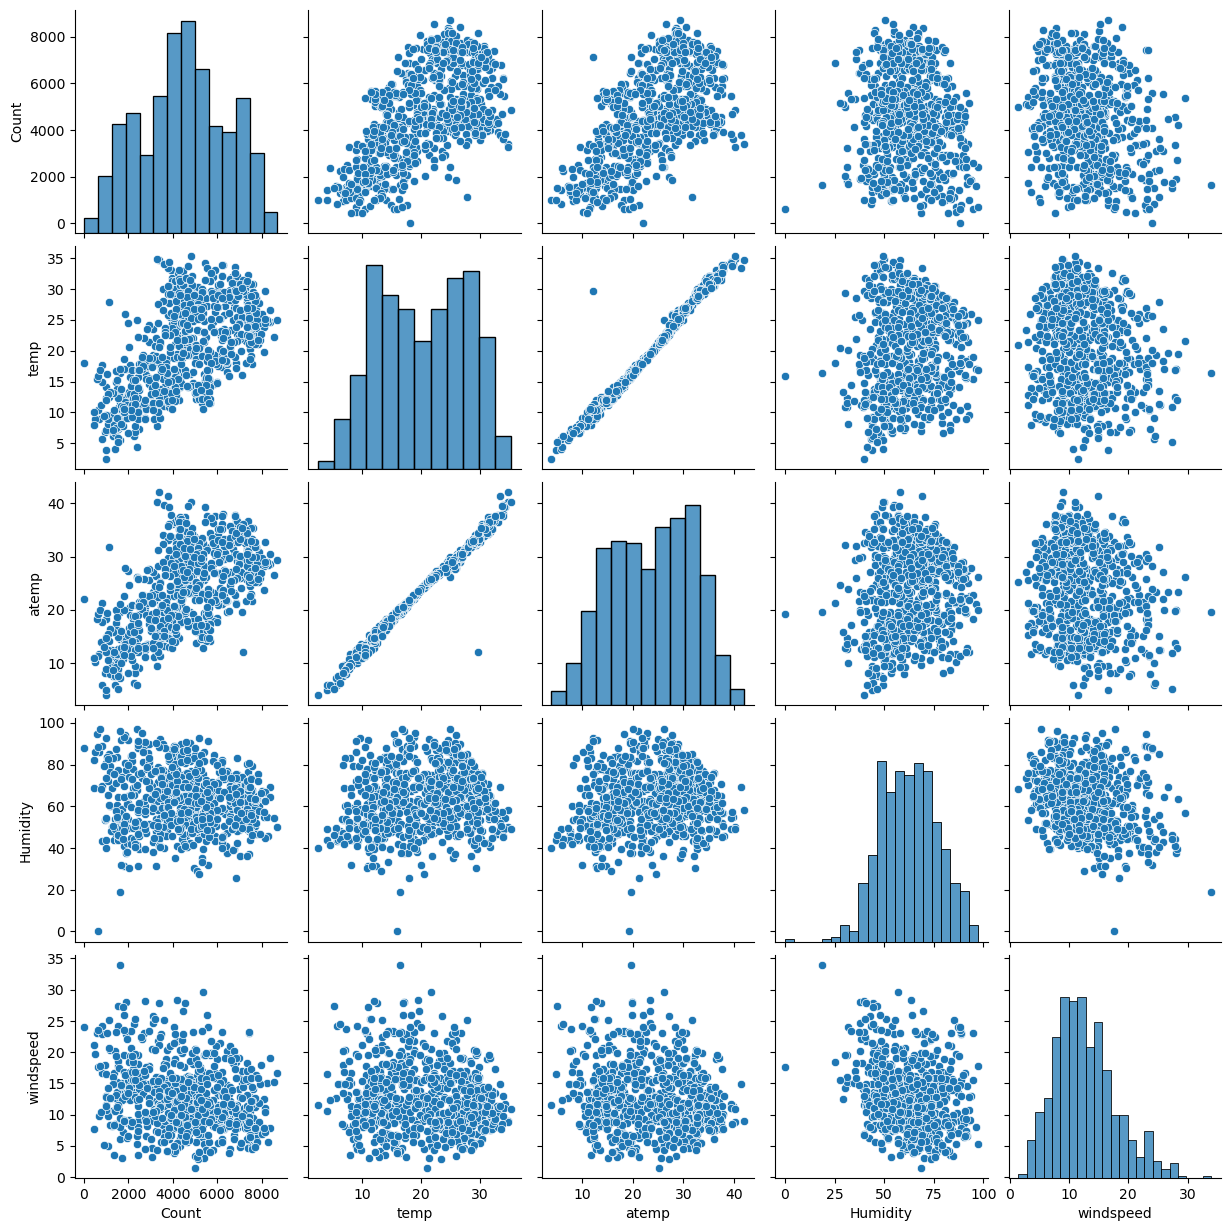

In [357]:
#Drawing pairplots to check linear relationship between continous numeric variables
sns.pairplot(bike_data,vars = ['Count','temp','atemp','Humidity','windspeed'])
plt.show()



temp and atemp are highly correlated with the target variable

In [358]:
#Modelling

#Checking the shape before splitting
bike_data.shape


(730, 31)

In [359]:
#Setting the random state so that both train and test set have same data everytime
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [360]:
#Reconfirming the count of 70-30 split
print(bike_train.shape)
print(bike_test.shape)

(510, 31)
(219, 31)


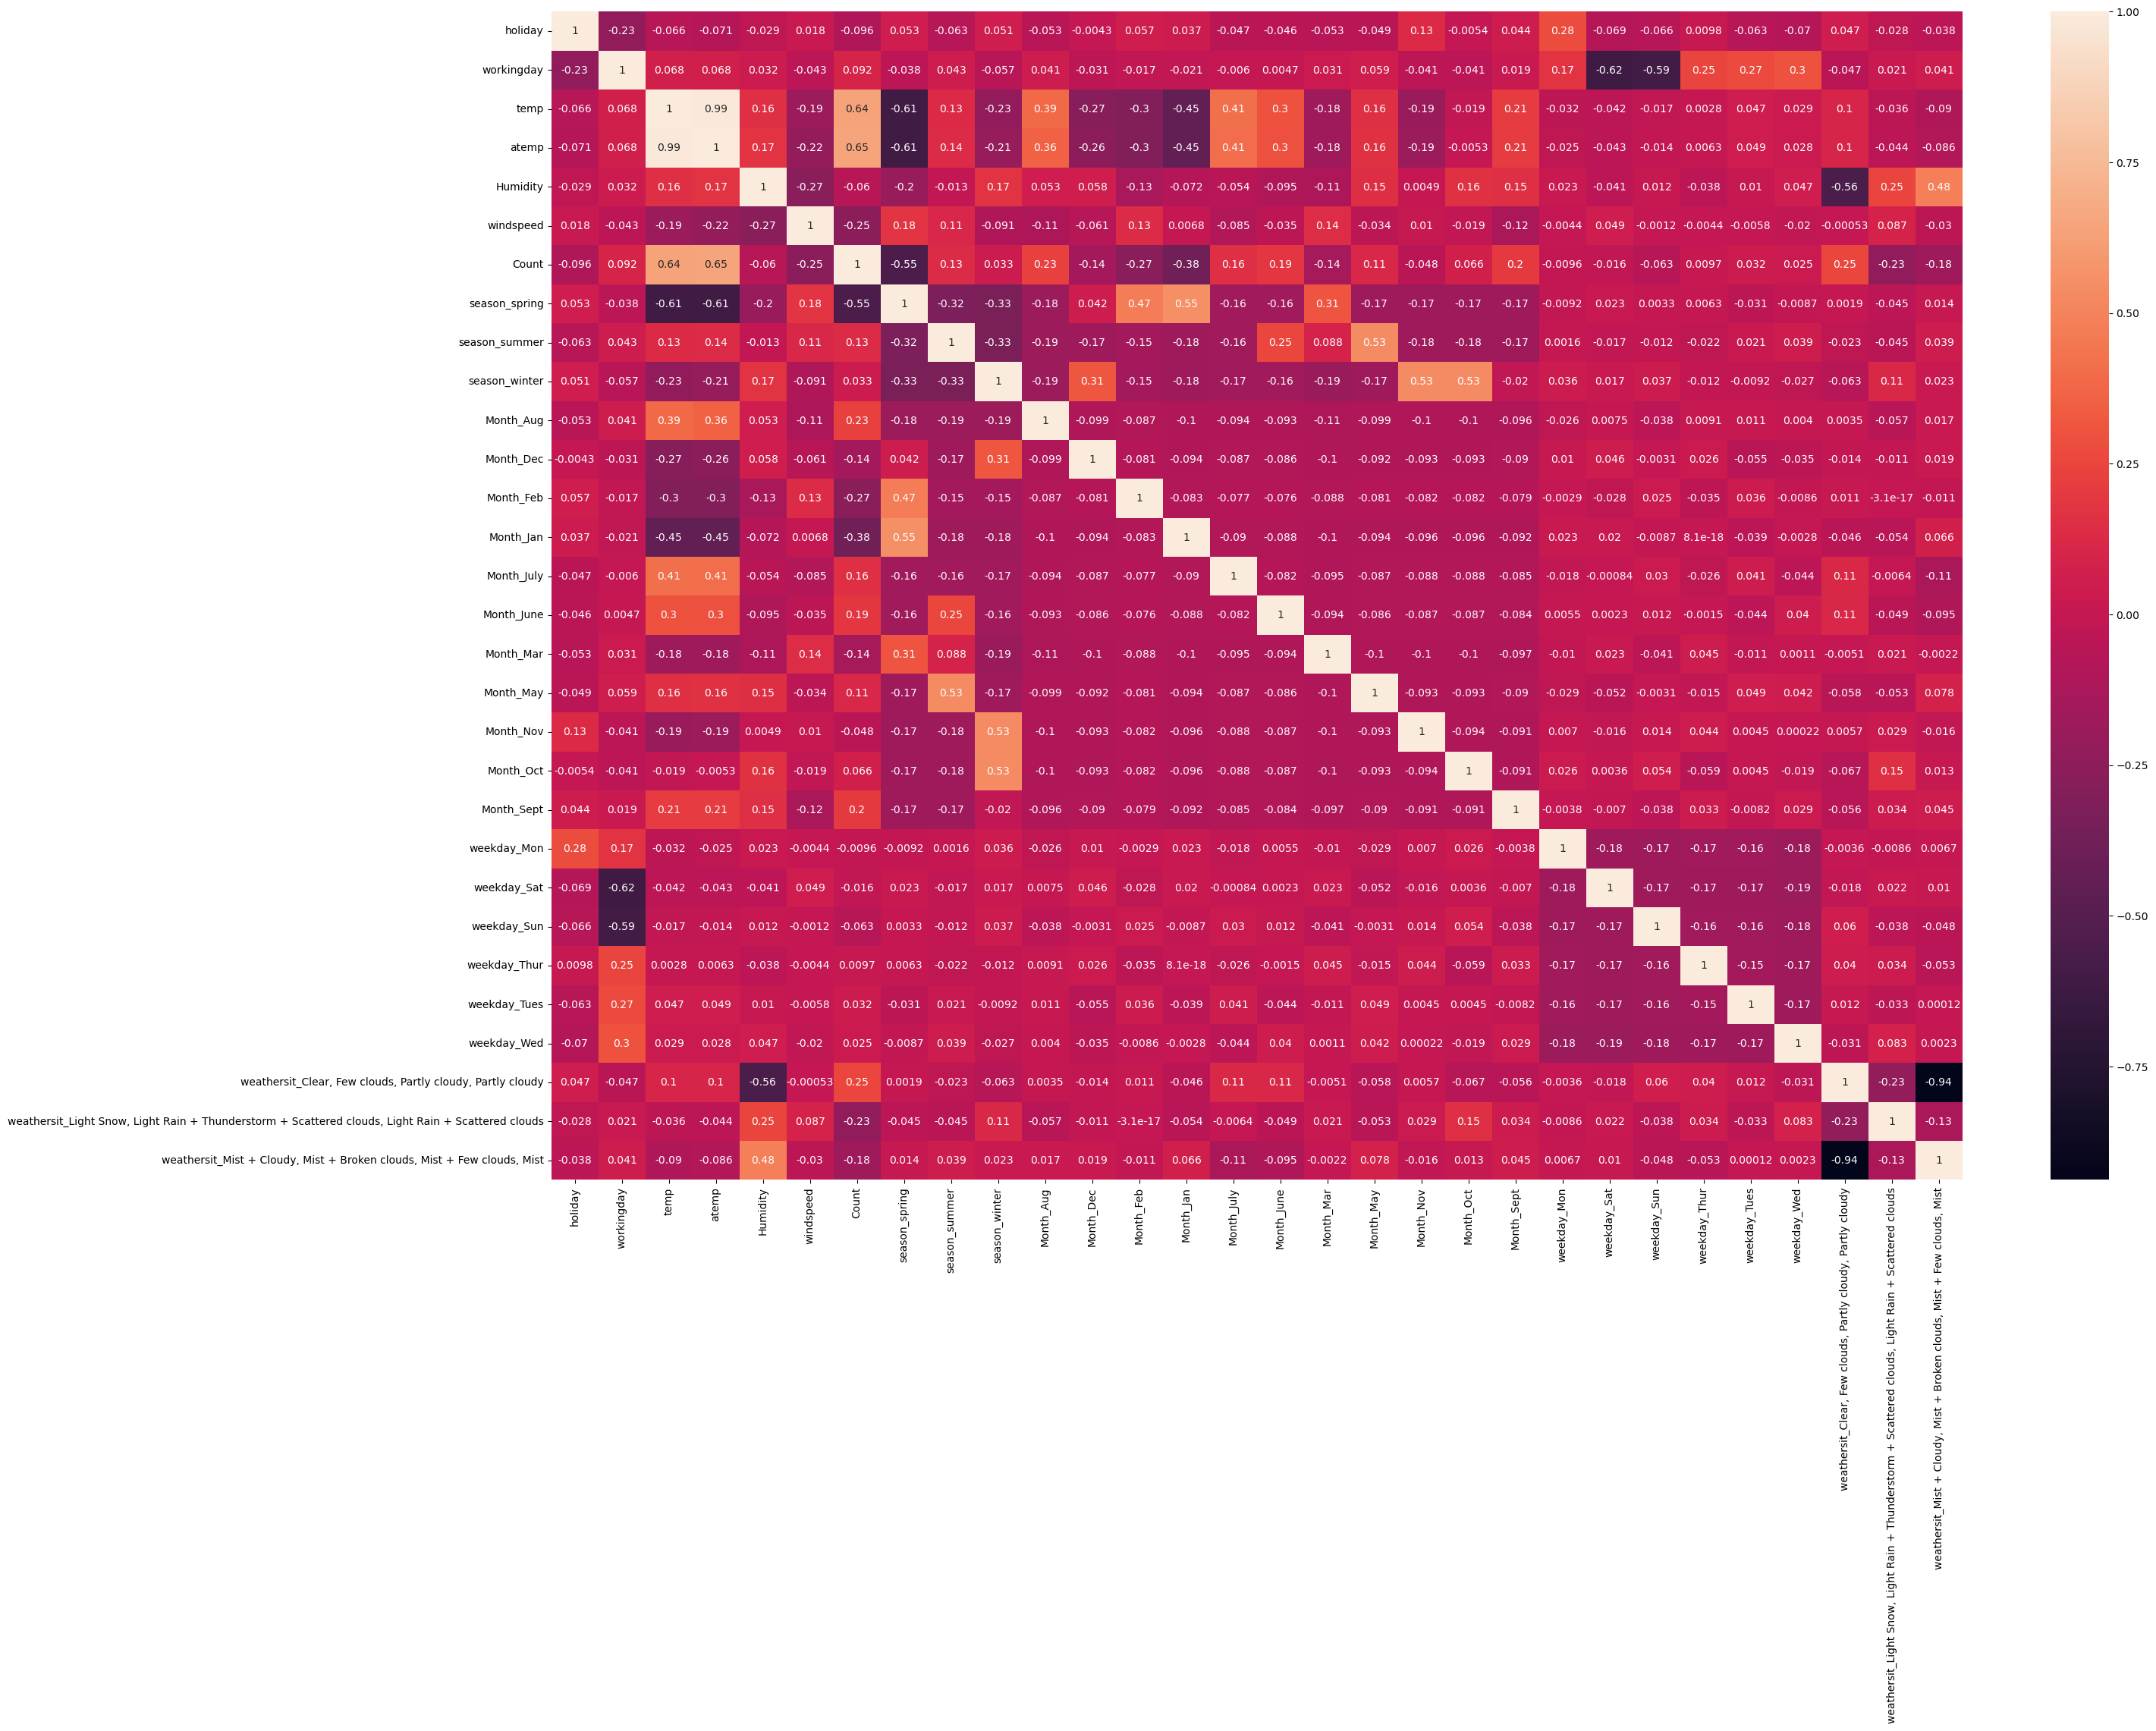

In [361]:
#Checking correlations between train data set variable, as later it can be used for reference along with VIF and p-value for 
#identifying the correct variable to select/drop

plt.figure(figsize = (30,20))
sns.heatmap(bike_train.corr(), annot = True)
plt.show()

In [362]:
#Rescaling the features as it is important that all variables are at the same level before modelling

scaler = MinMaxScaler()

In [363]:
#Checking the dataset before scaling
bike_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
653,2019,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
576,2019,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
426,2019,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
728,2019,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
482,2019,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [364]:
bike_train.shape

(510, 31)

In [365]:
#Applying scaler to all numeric columns
numeric_vars = ['temp','atemp','Humidity','windspeed','Count']
bike_train[numeric_vars] = scaler.fit_transform(bike_train[numeric_vars])

In [366]:
#Checking whether the changes of scaling are reflecting or not. 
bike_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
653,2019,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
576,2019,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
426,2019,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
728,2019,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
482,2019,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [367]:
#Checking the statistical values for all the columns in the dataset
bike_train.describe()

,holiday,workingday,temp,atemp,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Columns - temp, atemp, Humidity, windspeed and Count have been scaled as the values are between 0 and 1

In [368]:
#Building the model

#Taking the target variable in y_train set
y_train = bike_train.pop('Count')

In [369]:
#Taking rest of the variables in X_train set
X_train = bike_train

Iterative Modelling Process

- We have around 31 Predictors to predict our outcome. Analysing these many predictors can be hectic.
- To simplify this process, we will use RFE (Recursive Feature Elimination) method to which will provide us with set of   variables ranked in an order of importance (of impacting outcome)
- We will pass an arbitary number (15 in this case), which means the method will rank first 15 predictors as 1 & remaining as 0. Creating a generalised function for evaluating Variance Inflation Factor

In [370]:
#Fitting X_train and y_train to Linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [371]:
#Considering 15 variables in RFE
rfe = RFE(lm, step = 15)
rfe = rfe.fit(X_train, y_train)

In [372]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,Year,True,1
27,"weathersit_Clear, Few clouds, Partly cloudy, P...",True,1
23,weekday_Sun,True,1
22,weekday_Sat,True,1
28,"weathersit_Light Snow, Light Rain + Thundersto...",True,1
13,Month_Jan,True,1
9,season_winter,True,1
14,Month_July,True,1
29,"weathersit_Mist + Cloudy, Mist + Broken clouds...",True,1
6,windspeed,True,1


RFE method has successfully evaluated the top 15 predictors which will impact the outcome. But we won't be relying on this completely and will go for manual elimination

In [373]:
#Changing the data type from object to int
bike_train['Year'] = pd.to_numeric(bike_train['Year'])

Model Building Process - 1

In [374]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.8
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          5.18e-188
Time:                        01:06:03   Log-Likelihood:                 506.37
No. Observations:                 510   AIC:                            -984.7
Df Residuals:                     496   BIC:                            -925.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                               -294.4594     10.444    -28.194      0.000    -314.979    -273.939
Year                                                                                                   0.2311      0.008     28.213      0.000       0.215       0.247
holiday                                                                                              -73.6788      2.611    -28.220      0.000     -78.809     -68.549
workingday                                                                                           -73.5823      2.611    -28.179      0.000     -78.713     -68.452
temp                                                                                                   0.4788      0.032     15.195      0.000       0.417       0.541
Humidity                                                                                              -0.1344      0.038     -3.537      0.000      -0.209      -0.060
windspeed                                                                                             -0.1827      0.026     -7.069      0.000      -0.233      -0.132
season_spring                                                                                         -0.0999      0.015     -6.461      0.000      -0.130      -0.070
season_winter                                                                                          0.0526      0.013      4.194      0.000       0.028       0.077
Month_Jan                                                                                             -0.0387      0.018     -2.187      0.029      -0.073      -0.004
Month_July                                                                                            -0.0864      0.017     -5.072      0.000      -0.120      -0.053
weekday_Sat                                                                                          -73.5718      2.611    -28.179      0.000     -78.701     -68.442
weekday_Sun                                                                                          -73.6265      2.611    -28.196      0.000     -78.757     -68.496
weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy                                           -98.0501      3.481    -28.165      0.000    -104.890     -91.210
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   -98.3004      3.481    -28.239      0.000    -105.140     -91.461
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist      

In [375]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
10,weekday_Sat,inf
11,weekday_Sun,inf
12,"weathersit_Clear, Few clouds, Partly cloudy, P...",inf
13,"weathersit_Light Snow, Light Rain + Thundersto...",inf
14,"weathersit_Mist + Cloudy, Mist + Broken clouds...",inf
3,temp,3.12
6,season_spring,2.72
4,Humidity,1.89


The p-values are within normal range, hence we will check VIF. For multiple columns VIF is infinity. Hence considering business understanding we will remove 1 column as we to go the next iteration, hence dropping 'workingday'

Model 2

In [376]:
col = col.drop(['workingday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train, X_train_sm)
lr_model_2 = lr2.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.8
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          5.18e-188
Time:                        01:06:03   Log-Likelihood:                 506.37
No. Observations:                 510   AIC:                            -984.7
Df Residuals:                     496   BIC:                            -925.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                               -349.6462     12.402    -28.192      0.000    -374.014    -325.278
Year                                                                                                   0.2311      0.008     28.213      0.000       0.215       0.247
holiday                                                                                               -0.0965      0.026     -3.730      0.000      -0.147      -0.046
temp                                                                                                   0.4788      0.032     15.195      0.000       0.417       0.541
Humidity                                                                                              -0.1344      0.038     -3.537      0.000      -0.209      -0.060
windspeed                                                                                             -0.1827      0.026     -7.069      0.000      -0.233      -0.132
season_spring                                                                                         -0.0999      0.015     -6.461      0.000      -0.130      -0.070
season_winter                                                                                          0.0526      0.013      4.194      0.000       0.028       0.077
Month_Jan                                                                                             -0.0387      0.018     -2.187      0.029      -0.073      -0.004
Month_July                                                                                            -0.0864      0.017     -5.072      0.000      -0.120      -0.053
weekday_Sat                                                                                            0.0105      0.011      0.923      0.356      -0.012       0.033
weekday_Sun                                                                                           -0.0442      0.012     -3.744      0.000      -0.067      -0.021
weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy                                          -116.4457      4.134    -28.168      0.000    -124.568    -108.323
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  -116.6960      4.134    -28.229      0.000    -124.818    -108.574
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -116.5045      4.135    -28.178      0.000    -124.628    -108.381
=============================================================================

In [377]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,"weathersit_Clear, Few clouds, Partly cloudy, P...",10588546.22
13,"weathersit_Mist + Cloudy, Mist + Broken clouds...",5791016.47
12,"weathersit_Light Snow, Light Rain + Thundersto...",496326.18
2,temp,3.12
5,season_spring,2.72
3,Humidity,1.89
6,season_winter,1.81
7,Month_Jan,1.55
8,Month_July,1.26
4,windspeed,1.19


As weekday_Sat has high p value, we will drop this.

Model 3

In [378]:
col = col.drop(['weekday_Sat'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train, X_train_sm)
lr3_model = lr3.fit()
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.6
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          5.25e-189
Time:                        01:06:03   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     497   BIC:                            -930.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                               -349.2402     12.393    -28.181      0.000    -373.589    -324.891
Year                                                                                                   0.2309      0.008     28.203      0.000       0.215       0.247
holiday                                                                                               -0.0986      0.026     -3.825      0.000      -0.149      -0.048
temp                                                                                                   0.4785      0.032     15.189      0.000       0.417       0.540
Humidity                                                                                              -0.1357      0.038     -3.574      0.000      -0.210      -0.061
windspeed                                                                                             -0.1819      0.026     -7.043      0.000      -0.233      -0.131
season_spring                                                                                         -0.0998      0.015     -6.456      0.000      -0.130      -0.069
season_winter                                                                                          0.0529      0.013      4.225      0.000       0.028       0.078
Month_Jan                                                                                             -0.0385      0.018     -2.178      0.030      -0.073      -0.004
Month_July                                                                                            -0.0861      0.017     -5.056      0.000      -0.120      -0.053
weekday_Sun                                                                                           -0.0461      0.012     -3.976      0.000      -0.069      -0.023
weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy                                          -116.3106      4.131    -28.157      0.000    -124.427    -108.195
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  -116.5605      4.131    -28.219      0.000    -124.676    -108.445
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -116.3691      4.131    -28.167      0.000    -124.486    -108.252
==============================================================================
Omnibus:                       59.409   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.838
Skew:  

In [379]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,"weathersit_Clear, Few clouds, Partly cloudy, P...",10575247.44
12,"weathersit_Mist + Cloudy, Mist + Broken clouds...",5783738.42
11,"weathersit_Light Snow, Light Rain + Thundersto...",495701.84
2,temp,3.12
5,season_spring,2.72
3,Humidity,1.89
6,season_winter,1.81
7,Month_Jan,1.55
8,Month_July,1.26
4,windspeed,1.18


All the p-values are in usual range, but VIF is high. Hence, eliminating one of those columns having high VIF i.e. 'weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy'

Model 4

In [380]:
col = col.drop(['weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train, X_train_sm)
lr4_model = lr4.fit()
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.6
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          5.25e-189
Time:                        01:06:04   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     497   BIC:                            -930.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                               -465.5508     16.524    -28.175      0.000    -498.016    -433.086
Year                                                                                                   0.2309      0.008     28.203      0.000       0.215       0.247
holiday                                                                                               -0.0986      0.026     -3.825      0.000      -0.149      -0.048
temp                                                                                                   0.4785      0.032     15.189      0.000       0.417       0.540
Humidity                                                                                              -0.1357      0.038     -3.574      0.000      -0.210      -0.061
windspeed                                                                                             -0.1819      0.026     -7.043      0.000      -0.233      -0.131
season_spring                                                                                         -0.0998      0.015     -6.456      0.000      -0.130      -0.069
season_winter                                                                                          0.0529      0.013      4.225      0.000       0.028       0.078
Month_Jan                                                                                             -0.0385      0.018     -2.178      0.030      -0.073      -0.004
Month_July                                                                                            -0.0861      0.017     -5.056      0.000      -0.120      -0.053
weekday_Sun                                                                                           -0.0461      0.012     -3.976      0.000      -0.069      -0.023
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2499      0.027     -9.395      0.000      -0.302      -0.198
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0586      0.011     -5.514      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       59.409   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.838
Skew:                          -0.581   Prob(JB):                     8.77e-35
Kurtosis:                       5.455   Cond. No.                     8.29e+06
================

In [381]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,59.84
3,Humidity,39.02
2,temp,20.40
4,windspeed,5.42
5,season_spring,3.58
6,season_winter,2.40
11,"weathersit_Mist + Cloudy, Mist + Broken clouds...",2.38
7,Month_Jan,1.70
8,Month_July,1.37
10,"weathersit_Light Snow, Light Rain + Thundersto...",1.28


The p-values are within normal ranges, hence we will go ahead with VIF elimiation. Removing 'Humidity' as it has high VIF

Model 5

In [382]:
col = col.drop(['Humidity'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train, X_train_sm)
lr5_model = lr5.fit()
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          1.81e-187
Time:                        01:06:04   Log-Likelihood:                 499.46
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     498   BIC:                            -924.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                               -472.2728     16.609    -28.434      0.000    -504.906    -439.640
Year                                                                                                   0.2342      0.008     28.454      0.000       0.218       0.250
holiday                                                                                               -0.0997      0.026     -3.823      0.000      -0.151      -0.048
temp                                                                                                   0.4502      0.031     14.593      0.000       0.390       0.511
windspeed                                                                                             -0.1562      0.025     -6.223      0.000      -0.205      -0.107
season_spring                                                                                         -0.1023      0.016     -6.547      0.000      -0.133      -0.072
season_winter                                                                                          0.0445      0.012      3.577      0.000       0.020       0.069
Month_Jan                                                                                             -0.0420      0.018     -2.352      0.019      -0.077      -0.007
Month_July                                                                                            -0.0787      0.017     -4.600      0.000      -0.112      -0.045
weekday_Sun                                                                                           -0.0490      0.012     -4.190      0.000      -0.072      -0.026
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2876      0.025    -11.647      0.000      -0.336      -0.239
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0805      0.009     -9.171      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       61.195   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.509
Skew:                          -0.597   Prob(JB):                     5.15e-36
Kurtosis:                       5.494   Cond. No.                     8.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] 

In [383]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,35.98
2,temp,19.23
3,windspeed,5.00
4,season_spring,3.58
5,season_winter,2.32
6,Month_Jan,1.69
10,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.59
7,Month_July,1.35
8,weekday_Sun,1.18
9,"weathersit_Light Snow, Light Rain + Thundersto...",1.08


The p-values are in normal range, hence considering VIF factor. But year and temp are important variables as they are highly related to the target variable so not removing them. 
Checking the relation of 'weekday_Sun' and removing it would show a good result.

Model 6

In [384]:
col = col.drop(['weekday_Sun'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr6 = sm.OLS(y_train, X_train_sm)
lr6_model = lr6.fit()
lr6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.9
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          6.10e-185
Time:                        01:06:04   Log-Likelihood:                 490.63
No. Observations:                 510   AIC:                            -959.3
Df Residuals:                     499   BIC:                            -912.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                               -472.4224     16.882    -27.983      0.000    -505.592    -439.253
Year                                                                                                   0.2342      0.008     28.002      0.000       0.218       0.251
holiday                                                                                               -0.0917      0.026     -3.471      0.001      -0.144      -0.040
temp                                                                                                   0.4523      0.031     14.427      0.000       0.391       0.514
windspeed                                                                                             -0.1564      0.026     -6.132      0.000      -0.207      -0.106
season_spring                                                                                         -0.1031      0.016     -6.494      0.000      -0.134      -0.072
season_winter                                                                                          0.0425      0.013      3.357      0.001       0.018       0.067
Month_Jan                                                                                             -0.0410      0.018     -2.261      0.024      -0.077      -0.005
Month_July                                                                                            -0.0814      0.017     -4.686      0.000      -0.116      -0.047
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2822      0.025    -11.256      0.000      -0.331      -0.233
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0785      0.009     -8.811      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       57.983   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.019
Skew:                          -0.596   Prob(JB):                     3.94e-31
Kurtosis:                       5.273   Cond. No.                     8.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [385]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,35.74
2,temp,19.22
3,windspeed,5.00
4,season_spring,3.57
5,season_winter,2.32
6,Month_Jan,1.69
9,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.59
7,Month_July,1.34
8,"weathersit_Light Snow, Light Rain + Thundersto...",1.07
1,holiday,1.04


In [386]:
#Checking the model params
lr6_model.params

const                                                                                                -472.422397
Year                                                                                                    0.234235
holiday                                                                                                -0.091727
temp                                                                                                    0.452303
windspeed                                                                                              -0.156427
season_spring                                                                                          -0.103141
season_winter                                                                                           0.042452
Month_Jan                                                                                              -0.041017
Month_July                                                                                      

This model looks good, as there seems to be Very Low Multicollinearity between the predictors and the p-values for all the predictors seems to be significantly low. Though we VIF as 19.22 for "Temp" variable this seems to be important in this analysis, hence we will continue with this variable and model. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

### FINAL MODEL INTERPRETATION

According to Hypothesis Testing:

Hypothesis testing states that:

Null Hypothesis H0:B1=B2=...=Bn=0 (Here co-efficients will be equal to zero)
Alternate Hyposthesis H1: at least one B(i) != 0 (Atleast one co-efficients will not be equal to Zero)

From Model 6 summary, we reject the null hypothesis

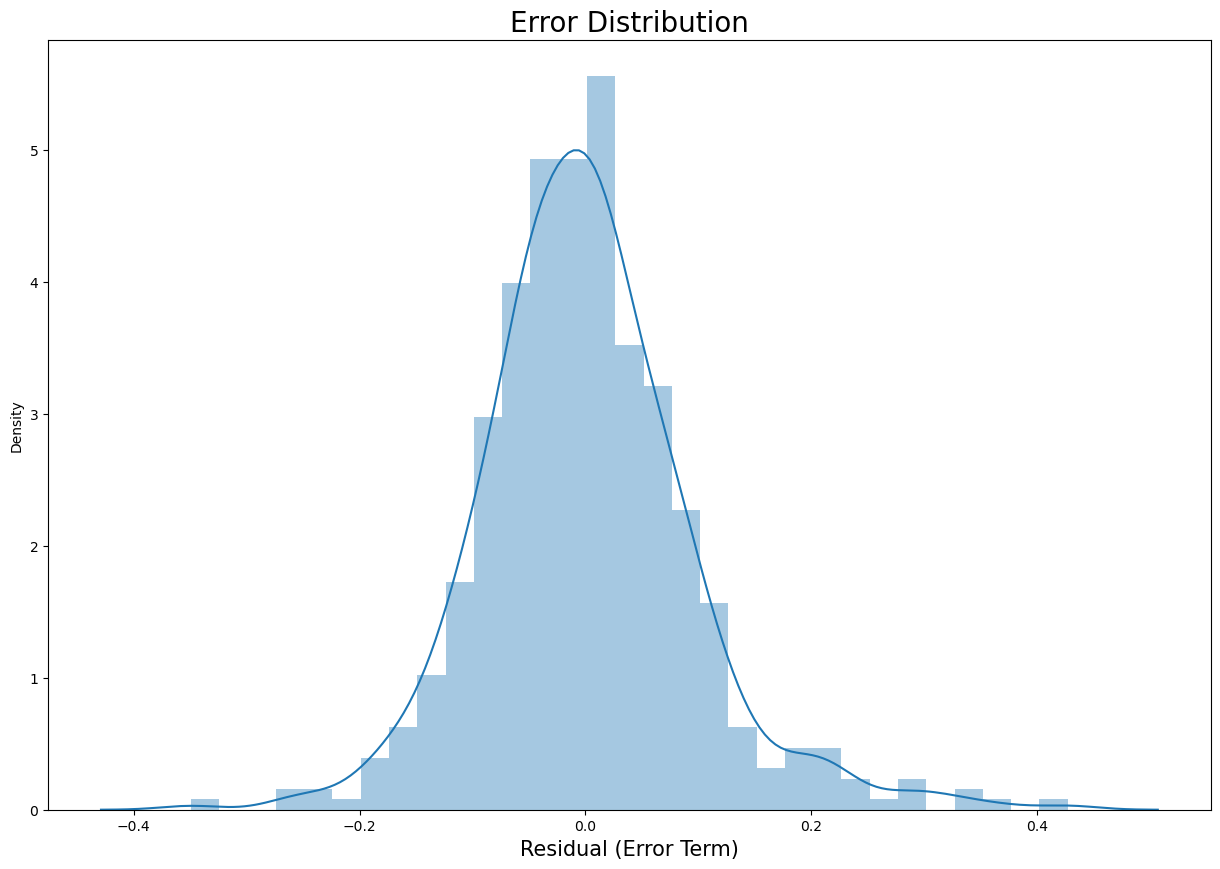

In [387]:
#Residual Analysis of Train data
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
y_train_pred = lr6_model.predict(X_train_sm)
residual = y_train_pred - y_train
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 15})
plt.title('Error Distribution', fontdict={'fontsize': 20})
sns.distplot(residual,ax=ax)
plt.show()

The graph above shows that error distribution is normally distributed across 0, and this indicates the model has handled the assumption error normal distribution


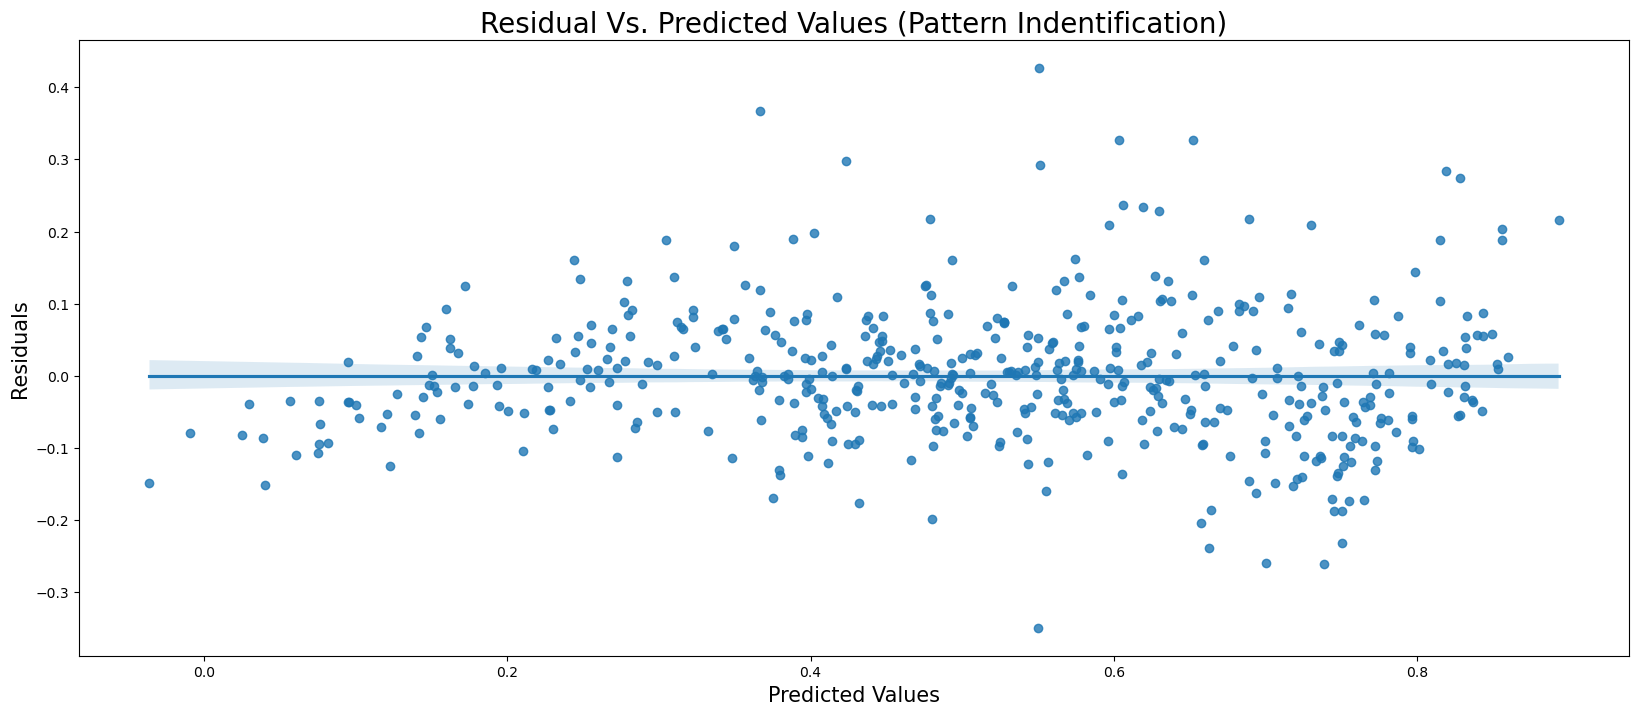

In [388]:
#Validating Homoscedasticity
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train_pred, y=residual,ax=ax)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

The graph above shows that it is homoscedastic in nature

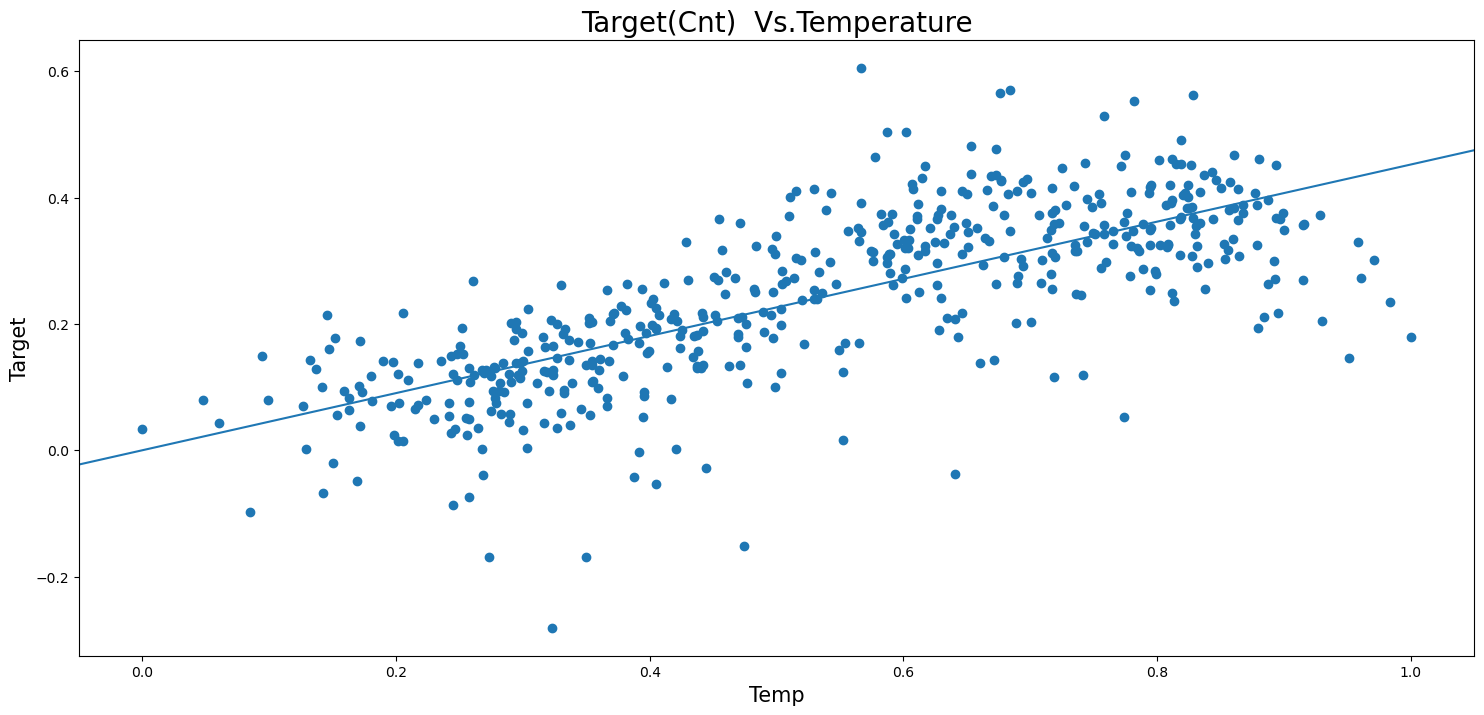

In [389]:
#Validating linearity for below columns
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr6_model, 'temp',ax=ax)
plt.title('Target(Cnt)  Vs.Temperature', fontdict={'fontsize': 20})
plt.xlabel('Temp', fontdict={'fontsize': 15})
plt.ylabel('Target', fontdict={'fontsize': 15})
plt.show()

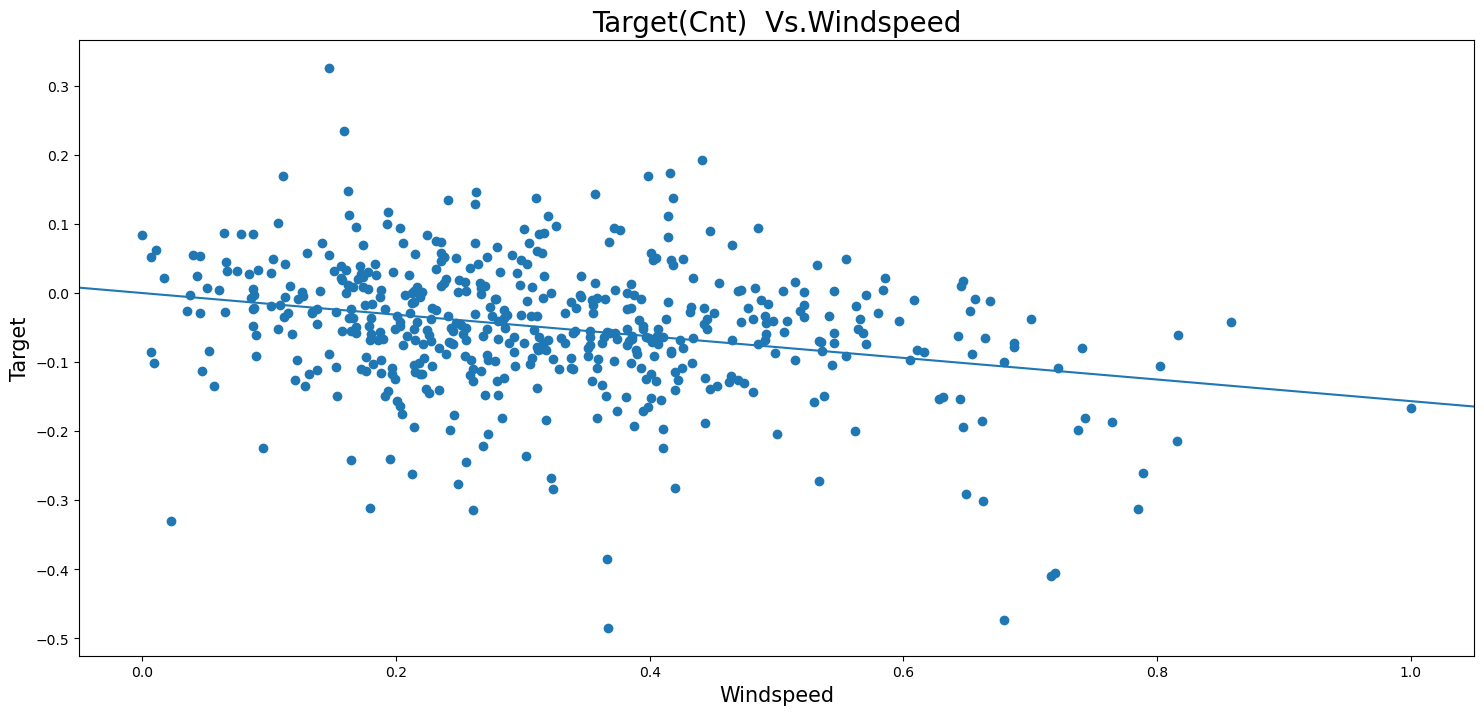

In [390]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr6_model, 'windspeed', ax=ax)
plt.title('Target(Cnt)  Vs.Windspeed', fontdict={'fontsize': 20})
plt.xlabel('Windspeed', fontdict={'fontsize': 15})
plt.ylabel('Target', fontdict={'fontsize': 15})
plt.show()

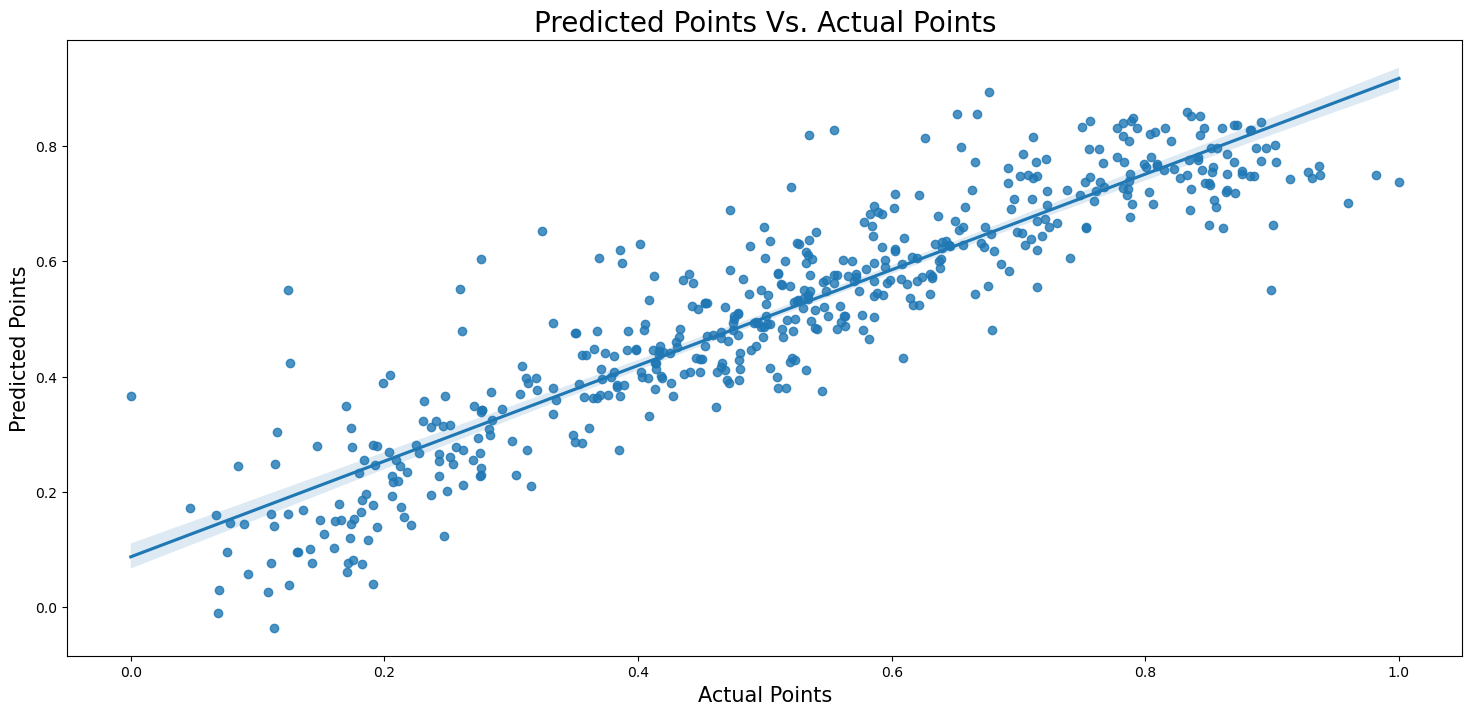

In [391]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train, y=y_train_pred, ax=ax)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

From the above graph, we can say that residuals are equal distributed across predicted value. This means we see equal variance and we do not observe high concentration of data points in certain region & low concentration in certain regions.
This proves Homoscedasticity of error terms

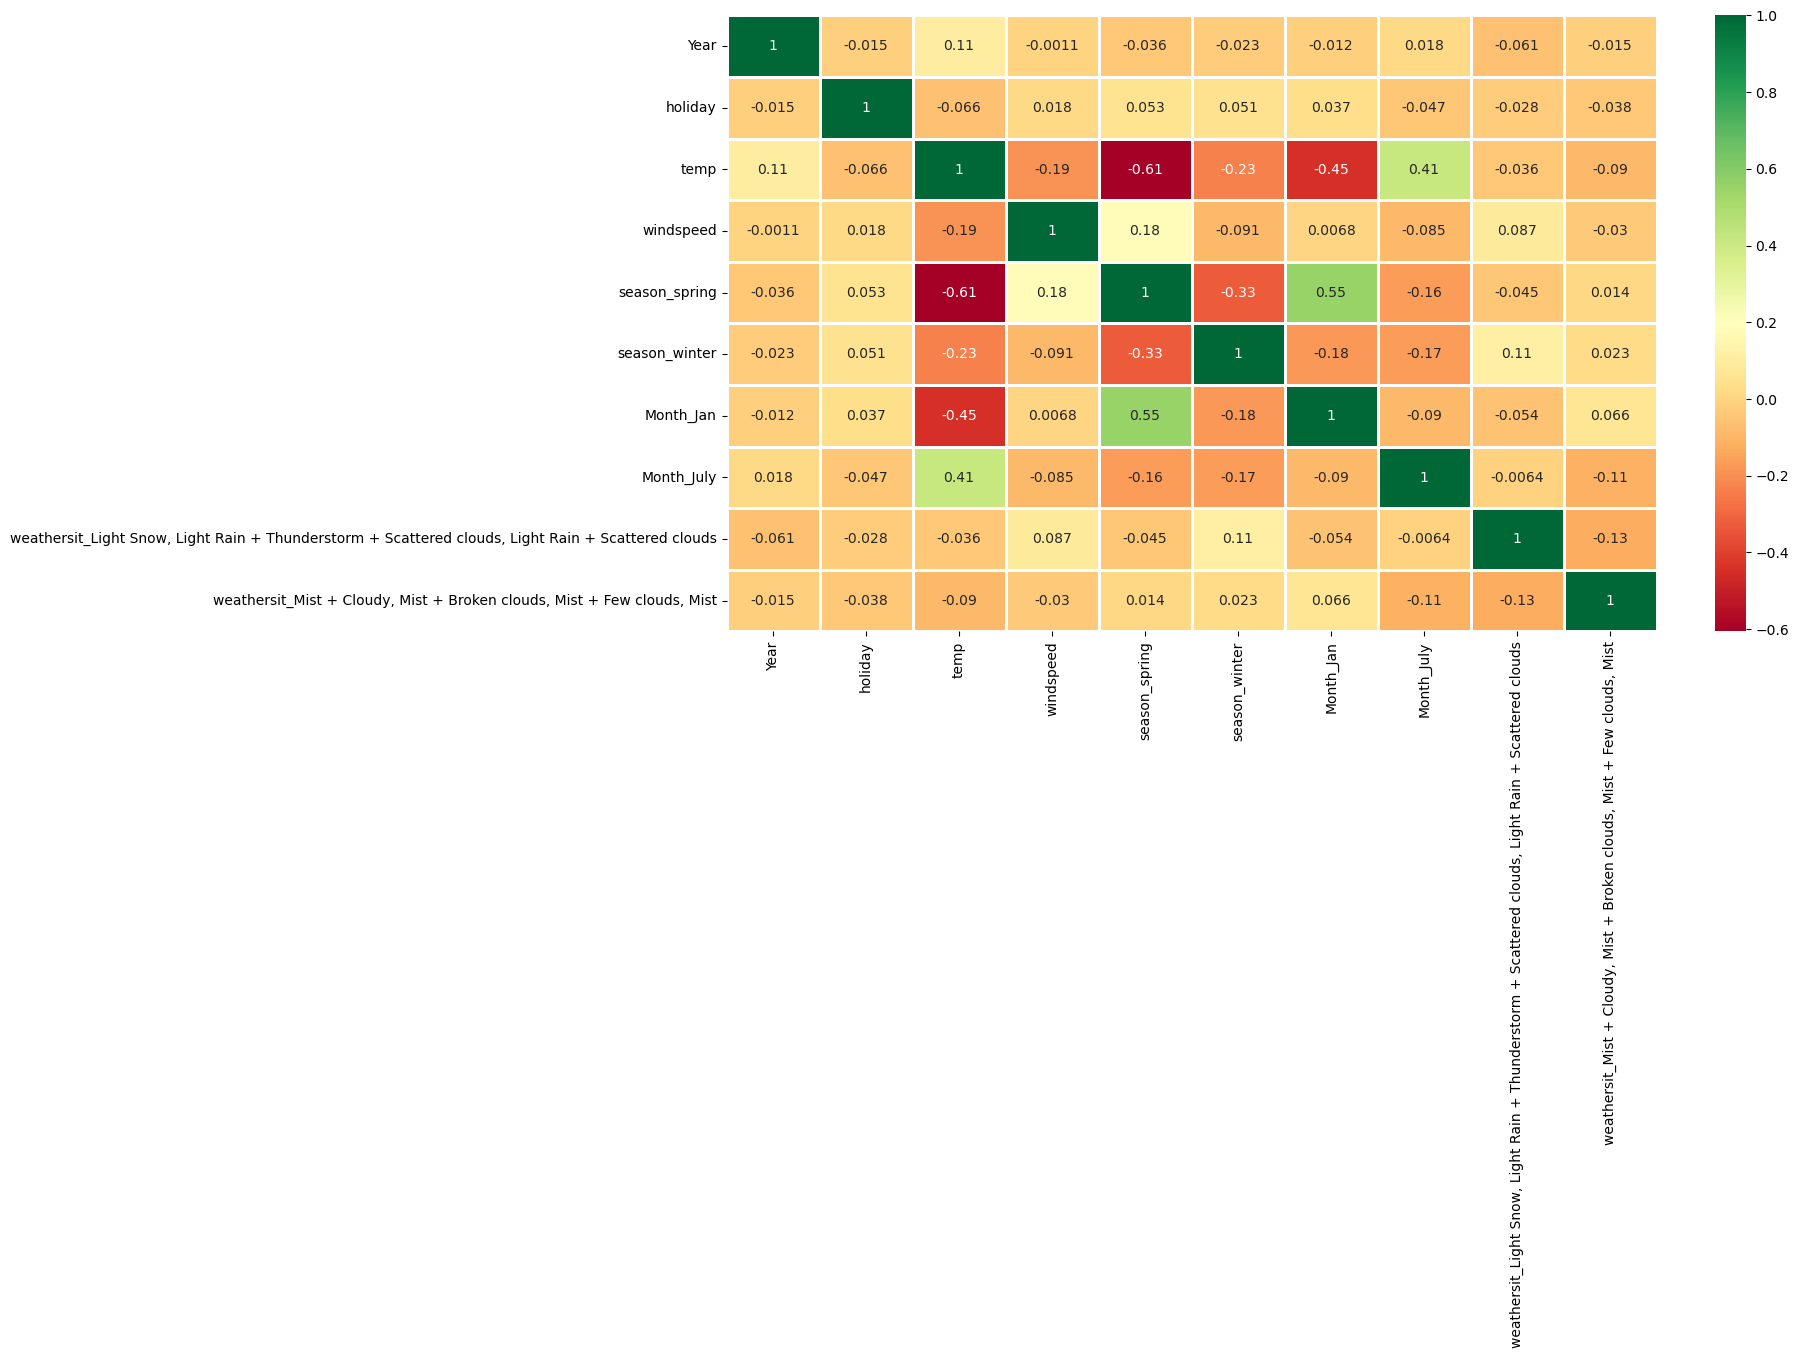

In [392]:
#Validating absence of multicollinearity in the below code snippet
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [393]:
#Calcuting R-square for train data
r2_score(y_train, y_train_pred)

0.8301809967881236

### Predicting on Test data


In [394]:
#Checking on variables that are to be considered
numeric_vars

['temp', 'atemp', 'Humidity', 'windspeed', 'Count']

In [395]:
bike_test[numeric_vars].head(10)

,temp,atemp,Humidity,windspeed,Count
184,29.793347,33.27085,63.7917,5.459106,6043
535,32.082500,36.04875,59.2083,7.625404,6211
299,19.270000,22.85230,81.2917,13.250121,2659
221,31.433347,34.24915,42.4167,13.417286,4780
152,29.315000,32.19710,30.5000,19.583229,4968
404,10.865000,13.09940,56.2083,13.000479,3830
198,30.613347,35.19625,65.1250,14.458868,4458
171,27.914153,31.88230,77.0417,11.458675,4835
512,29.212500,33.96500,67.6250,13.166907,6043
200,31.501653,37.34250,70.7083,7.625739,4332


In [396]:
#Transforming on the test set
bike_test[numeric_vars] = scaler.transform(bike_test[numeric_vars])
bike_test.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
184,2018,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
535,2019,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
299,2018,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
221,2018,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
152,2018,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [397]:
#Checking the bsic statistical functions
bike_test.describe()

,holiday,workingday,temp,atemp,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.027397,0.319635
std,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [398]:
#Fixing the X_test section for test dataset
y_test = bike_test.pop('Count')

In [399]:
#Fixing the y_test section for test dataset
X_test = bike_test

In [400]:
#Quick data type and null checks
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Year                                                                                                219 non-null    object 
 1   holiday                                                                                             219 non-null    int64  
 2   workingday                                                                                          219 non-null    int64  
 3   temp                                                                                                219 non-null    float64
 4   atemp                                                                                               219 non-null   

In [401]:
#Inputting the RFE selected columns for the test set as well and adding a constant for evaluation
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [402]:
#Checking whether the change is incorporated or not by info() step
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   const                                                                                               219 non-null    float64
 1   Year                                                                                                219 non-null    object 
 2   holiday                                                                                             219 non-null    int64  
 3   temp                                                                                                219 non-null    float64
 4   windspeed                                                                                           219 non-null   

In [403]:
#Checking whether the change is incorporated or not by head() step
X_test_new.head()

,const,Year,holiday,temp,windspeed,season_spring,season_winter,Month_Jan,Month_July,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
184,1.0,2018,1,0.831783,0.084219,0,0,0,1,0,1
535,1.0,2019,0,0.901354,0.153728,0,0,0,0,0,0
299,1.0,2018,0,0.511964,0.334206,0,1,0,0,0,1
221,1.0,2018,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,2018,0,0.817246,0.537414,0,0,0,0,0,0


In [404]:
#Changing year data type from object to int
X_test_new['Year'] = pd.to_numeric(X_test_new['Year'])

In [405]:
#Predicting on the test set using model 6 
y_pred = lr6_model.predict(X_test_new)

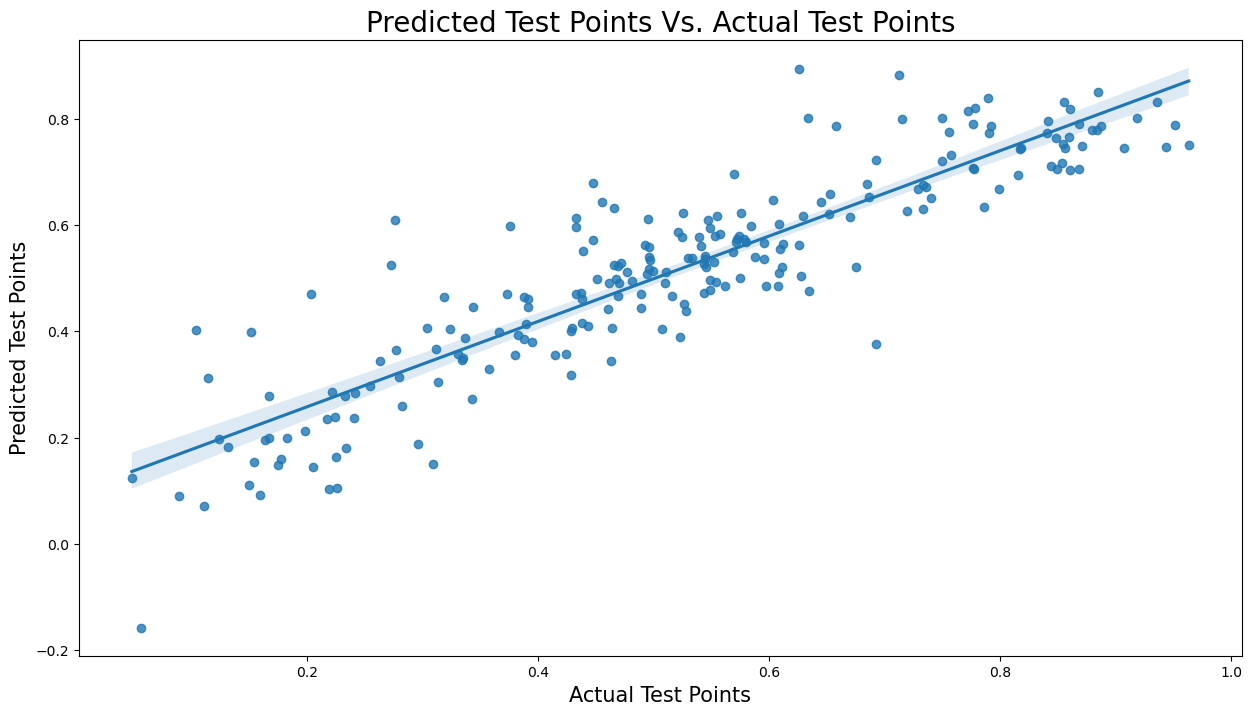

In [406]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
corr_plot = sns.regplot(x=y_test, y=y_pred,ax=ax)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

In [407]:
y_pred.head()

184    0.375207
535    0.881615
299    0.407028
221    0.609386
152    0.549319
dtype: float64

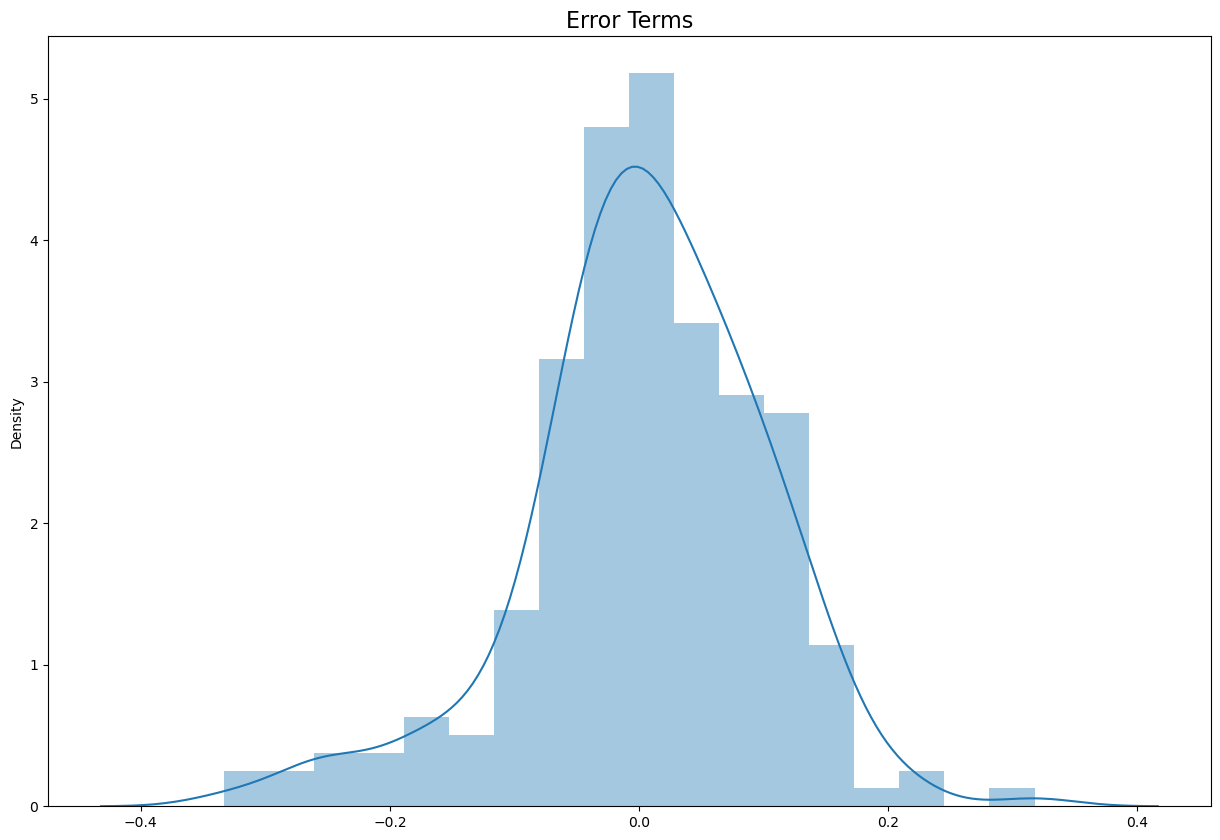

In [408]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
res_test = y_test - y_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

The above graph shows that the error terms are normally distributed around 0

In [409]:
#Calculating r-square value
r2_score = r2_score(y_test, y_pred)
r2_score


0.8024366702529521

In [410]:
#Checking the shape of the test dataframe
X_test_new.shape

(219, 11)

In [411]:
#Extracting 'n' for calculating adjusted r square
n= X_test_new.shape[0]
n

219

In [412]:
#Extracting 'p' for calculating adjusted r square
p = X_test_new.shape[1]
p

11

In [413]:
#Calculating adjusted r-square value
adjusted_r2 = 1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.7919381358219495

In [414]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0094


Final Report on Test & Train

Final Comparision of R^2 and Adjsuted R^2.

- Train R^2 : 0.830
- Train Adjusted R^2 :0.827 
- Test R^2 :0.8024
- Test Adjusted R^2 :0.7919

This seems to be a decent model as the individual r^2 and adjusted r^2 values are >= 0.80 and the difference between train and test set if less than 5%

In [415]:
#Checking model parameters of the finally selected model
lr6_model.params

const                                                                                                -472.422397
Year                                                                                                    0.234235
holiday                                                                                                -0.091727
temp                                                                                                    0.452303
windspeed                                                                                              -0.156427
season_spring                                                                                          -0.103141
season_winter                                                                                           0.042452
Month_Jan                                                                                              -0.041017
Month_July                                                                                      

Concluding Points

We can conclude that the model Model-6 fit isn't by chance, and has descent predictive power.
As per our final Model, the top 3 predictor variables that influences the bike booking are:

temp, Year, season_winter

- A unit increase in temp(Temperature) variable increase the bike hire numbers by 0.452303 units.
- A unit increase in Year(Year) variable increase the bike hire numbers by 0.234235 units.

So it recommended to give above variables utmost importance while planning to achieve maximum demand.

Next variables to be considered:

- Holiday - A coefficient value of ‘-0.091727’ indicated that a unit increase in holiday variable decreases bike hire numbers by 0.091727 units.
- windspeed - A coefficient value of ‘-0.156427’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.156427 units.